(1620, 1692) (1620, 4)


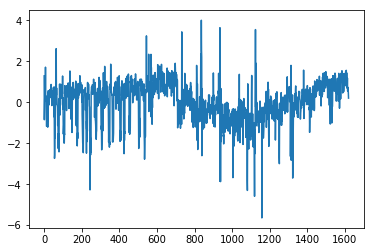

In [43]:
import pickle

with open('combined.pickle', 'rb') as file:
    X_raw, y = pickle.load(file)
print(X_raw.shape, y.shape)

import matplotlib.pyplot as plt
% matplotlib inline
from scipy.cluster.vq import whiten

X = X_raw

plt.plot(X[:, 0])

In [26]:
# Normalizing
import numpy as np
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)
print(np.mean(X, axis=0), np.std(X, axis=0))

[[  1.36242184e-16   5.04192024e-16  -1.19246177e-17 ...,  -1.60845274e-16
   -7.71330873e-17   9.38892311e-16]] [[ 1.  1.  1. ...,  1.  1.  1.]]


In [44]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import numpy as np

scores = []
for _ in range(5):
    print(_)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100, 50), random_state=_ * 5, activation='relu', shuffle=True)
    clf.fit(X_train, y_train) 

    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    print(score)
    
print(np.mean(scores), np.std(scores))

0
0.390654205607
1
0.401869158879
2
0.383177570093
3
0.388785046729
4
0.383177570093
0.38953271028 0.00685244963732
